In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import os
import sys
from glob import glob
import matplotlib
import tsfel

In [2]:
sys.path.append('..')

In [3]:
file_list = glob(f'../datasets/Dodgers/*.out')

In [4]:
df = pd.read_csv(file_list[0])
df

,-1,1
0,-1,1
1,-1,1
2,-1,1
3,-1,1
4,-1,1
...,...,...
50394,-1,1
50395,-1,1
50396,-1,1
50397,-1,1


In [5]:
df['1'].value_counts()

1
0    44788
1     5611
Name: count, dtype: int64

<Axes: >

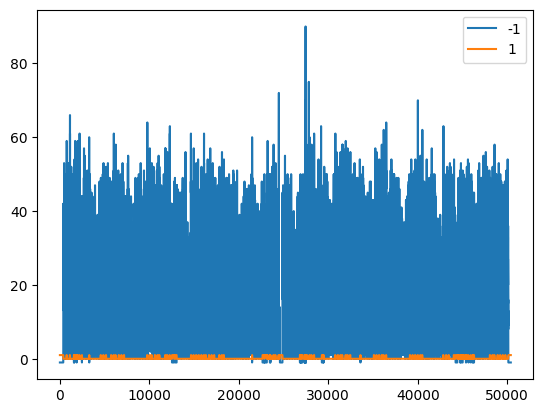

In [5]:
df.plot()

### Sliding Window for Splitting of data

First, a dummy dataframe is created.

In [6]:
data = {'A': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'B': [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]}
dummy_df = pd.DataFrame(data)
dummy_df

,A,B
0,1,11
1,2,12
2,3,13
3,4,14
4,5,15
5,6,16
6,7,17
7,8,18
8,9,19
9,10,20


To create a sliding window, we need the following components:

- dummy_df.values will convert the dataframe into an equivalent nd numpy array.

- np.arange(window_size)[None, :]: This will create a 2D array with values from 0 to window_size as elements of a row. We'll call this component A.

- np.arange(dummy_df.shape[0] - window_size)[:, None]: This will create a 2D array with range in the column. We'll call this component B.

If we add components A and B, we get a 2D array with <u>each row containing window_size elements and with an increment of 1 in each column</u>

In [7]:
win_size = 5

dummy_df_window = dummy_df.values[np.arange(win_size)[None, :] + np.arange(dummy_df.shape[0] - win_size)[:, None]]

dummy_df_window

array([[[ 1, 11],
        [ 2, 12],
        [ 3, 13],
        [ 4, 14],
        [ 5, 15]],

       [[ 2, 12],
        [ 3, 13],
        [ 4, 14],
        [ 5, 15],
        [ 6, 16]],

       [[ 3, 13],
        [ 4, 14],
        [ 5, 15],
        [ 6, 16],
        [ 7, 17]],

       [[ 4, 14],
        [ 5, 15],
        [ 6, 16],
        [ 7, 17],
        [ 8, 18]],

       [[ 5, 15],
        [ 6, 16],
        [ 7, 17],
        [ 8, 18],
        [ 9, 19]]], dtype=int64)

In [8]:
from src.Components.data_processing import data_process

In [9]:
windowed_data = data_process(file_list[0])

In [11]:
windowed_data.shape

(10030, 50, 2)

In [14]:
a = windowed_data[0, :, :]
adf = pd.DataFrame(a)

In [15]:
cfg = tsfel.get_features_by_domain()

In [18]:
X = tsfel.time_series_features_extractor(cfg, adf)

*** Feature extraction started ***


C:\Users\sharmapoudel\AppData\Local\Temp\ipykernel_4756\2254242232.py:1: UserWarning: Using default sampling frequency set in configuration file.
  X = tsfel.time_series_features_extractor(cfg, adf)


c:\Users\sharmapoudel\Documents\MAB-Model-Selection\venv\lib\site-packages\tsfel\feature_extraction\features.py:498: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.kurtosis(signal)
c:\Users\sharmapoudel\Documents\MAB-Model-Selection\venv\lib\site-packages\tsfel\feature_extraction\features.py:518: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return scipy.stats.skew(signal)



*** Feature extraction finished ***


In [19]:
X

,0_Absolute energy,0_Area under the curve,0_Autocorrelation,0_Average power,0_Centroid,0_ECDF Percentile Count_0,0_ECDF Percentile Count_1,0_ECDF Percentile_0,0_ECDF Percentile_1,0_ECDF_0,...,1_Wavelet variance_0,1_Wavelet variance_1,1_Wavelet variance_2,1_Wavelet variance_3,1_Wavelet variance_4,1_Wavelet variance_5,1_Wavelet variance_6,1_Wavelet variance_7,1_Wavelet variance_8,1_Zero crossing rate
0,50.0,0.49,50.0,102.040816,0.245,-1.0,-1.0,-1.0,-1.0,0.02,...,0.014101,0.045636,0.089499,0.138387,0.185065,0.22239,0.24428,0.248724,0.240273,0.0
